[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/S2Mostafa/CNN/blob/main/CNN.ipynb)

# Convolutional Neural Networks

In [1]:
import numpy as np
from scipy import signal
import pandas as pd

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Conv1D, BatchNormalization, MaxPooling1D, Activation, Flatten, Conv2D, MaxPool2D

from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt
import os
import pickle

import pydot 
import graphviz

from sklearn.metrics import confusion_matrix

# MNIST data loading 


In [2]:
# loading data
#https://en.wikipedia.org/wiki/MNIST_database
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

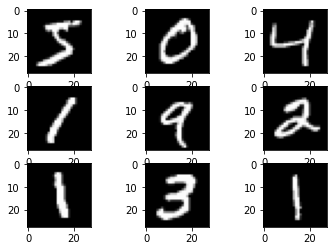

In [3]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

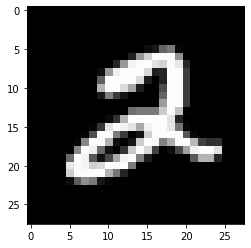

5


In [4]:
# data view
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
plt.imshow(x_train[5],cmap=plt.cm.gray)
plt.show()
print(y_train[0])

In [5]:
# train data 
x_train.shape

(60000, 28, 28)

In [6]:
# test data 
x_test.shape

(10000, 28, 28)

# Convolutional Operation

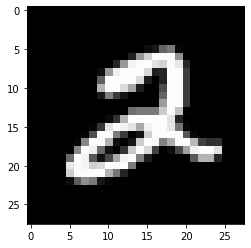

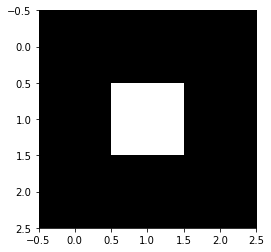

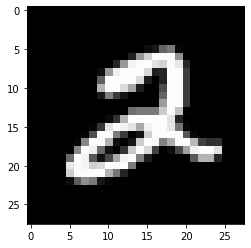

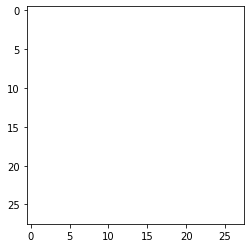

In [7]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 1, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
    filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

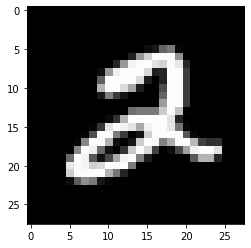

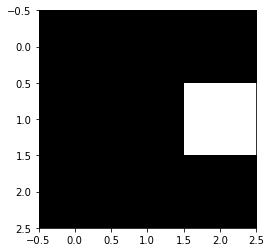

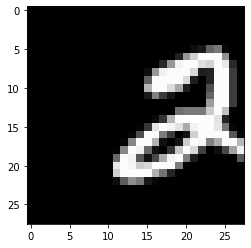

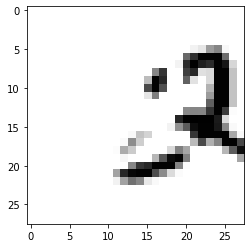

In [8]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 0., 0.],[0, 0, 1],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

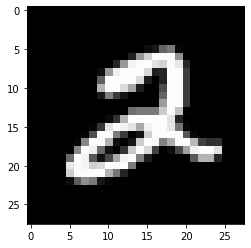

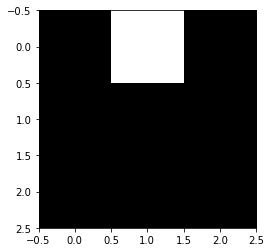

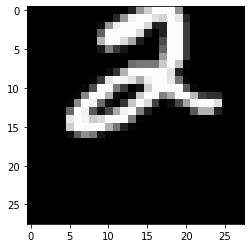

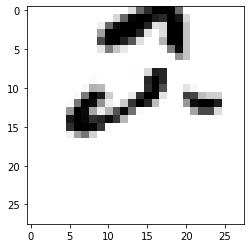

In [9]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[5]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[0., 1., 0.],[0, 0, 0],[0., 0., 0.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
for i in range(0,5):
     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

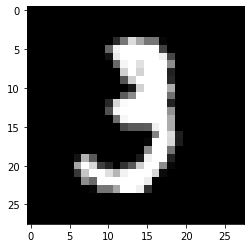

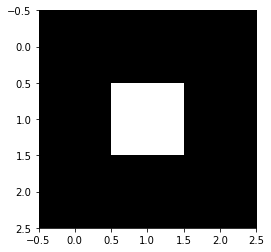

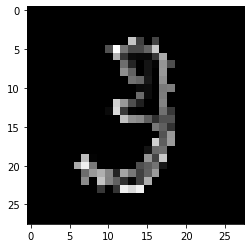

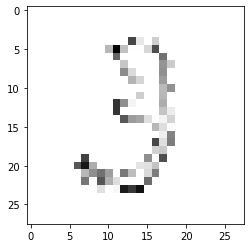

In [10]:
#https://numpy.org/doc/stable/reference/generated/numpy.convolve.html
sig =x_train[10]
#sig=np.where(sig>0, 1,sig)
plt.imshow(sig,cmap=plt.cm.gray)
plt.show()

win =np.array([[-1., -1., -1.],[-1., 8., -1.],[-1., -1., -1.]])
plt.imshow(win,cmap=plt.cm.gray)
plt.show()

filtered = signal.convolve(sig, win, mode='same')
# for i in range(0,2):
#     filtered = signal.convolve(filtered, win, mode='same')
filtered=np.where(filtered<0, 0,filtered)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.show()

change=filtered-sig
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
change=np.where(change<0, 0,change)
plt.imshow(change,cmap=plt.cm.binary)
plt.show()
#change

outputs is Shrinking 
Loosing information on corners of the image

Second method: (((W - K + 2P)/S) + 1)
        Here W = Input size
        K = Filter size
        S = Stride
        P = Padding 

        inpput_size - (filter_size - 1)

# Data pre-process

In [11]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
#-1 means that the length in that dimension is inferred.

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [15]:
y_train_cat.shape

(60000, 10)

In [16]:
len(np.unique(y_train))

10

# Create a Sequential Model

In [17]:
model_sq = Sequential()

model_sq.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Conv2D(64, (3, 3), activation='relu'))
model_sq.add(MaxPool2D(pool_size=(2, 2)))

model_sq.add(Flatten())

model_sq.add(Dense(128, activation='relu'))

model_sq.add(Dense(10, activation='softmax'))

model_sq.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

What we ceated

In [18]:
model_sq.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

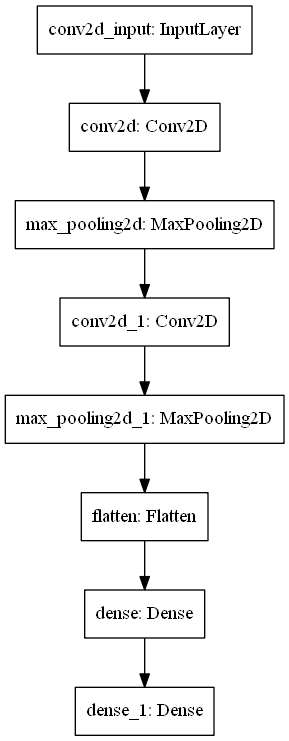

In [19]:

tf.keras.utils.plot_model(model_sq, "my_first_model.png")

In [20]:
#Train the model.model

In [21]:
model_sq_history = model_sq.fit(x_train, y_train_cat, batch_size=64,
          epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 22s 34ms/step - loss: 0.1957 - accuracy: 0.9429 - val_loss: 0.0770 - val_accuracy: 0.9768
Epoch 2/5
657/657 [==============================] - 22s 33ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0593 - val_accuracy: 0.9809
Epoch 3/5
657/657 [==============================] - 21s 32ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0720 - val_accuracy: 0.9782
Epoch 4/5
657/657 [==============================] - 16s 25ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0438 - val_accuracy: 0.9869
Epoch 5/5
657/657 [==============================] - 17s 26ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0.0472 - val_accuracy: 0.9863


313/313 [==============================] - 2s 5ms/step - loss: 0.0385 - accuracy: 0.9876
0.9876000285148621


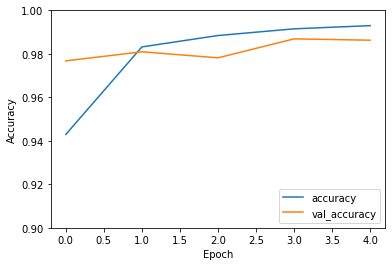

In [25]:
plt.plot(model_sq_history.history['accuracy'], label='accuracy')
plt.plot(model_sq_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model_sq.evaluate(x_test,  y_test_cat)
print(test_acc)

In [26]:
y_pred = model_sq.predict(x_test)

In [27]:
print(y_pred)

[[2.0451580e-08 3.9069935e-08 4.9342822e-07 ... 9.9999642e-01
  5.2124871e-10 5.8621840e-08]
 [1.0844851e-06 4.7878558e-07 9.9999845e-01 ... 6.2284157e-13
  1.1141497e-08 6.6742015e-14]
 [2.8574587e-07 9.9989510e-01 3.4703414e-06 ... 4.2987314e-05
  2.1287358e-06 5.7122179e-07]
 ...
 [3.1565477e-15 2.2058345e-10 1.8037171e-11 ... 2.3062866e-10
  4.1065356e-09 1.4772915e-09]
 [9.5564605e-09 1.6460666e-12 3.6374123e-10 ... 8.5485178e-12
  1.5134944e-03 3.4755732e-10]
 [9.6012832e-07 2.4997610e-10 6.0258782e-07 ... 9.9940802e-13
  6.2061799e-06 1.8756736e-09]]


In [28]:
y_pred_number=np.argmax(y_pred,axis=1)
print(y_pred_number)

[7 2 1 ... 4 5 6]


In [29]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(np.argmax(y_test_cat,axis=1), np.argmax(y_pred,axis=1))

In [30]:
print(cf_matrix)

[[ 978    1    0    0    0    0    0    1    0    0]
 [   0 1129    3    3    0    0    0    0    0    0]
 [   3    1 1023    2    1    0    0    1    1    0]
 [   0    1    2 1006    0    0    0    0    1    0]
 [   0    0    0    0  978    0    2    0    2    0]
 [   1    0    1   13    0  873    1    1    1    1]
 [   5    3    2    0    0    6  941    0    1    0]
 [   1    2   11    3    0    0    0 1011    0    0]
 [   4    0    1    3    0    1    0    0  964    1]
 [   7    3    0    6    7    4    0    4    5  973]]
